# Heart Disease Prediction using simple Neural Network model

In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [65]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric]);
        ax[idx].legend([metric, 'val_' + metric])

In [36]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#data = data.drop(columns=["target"])
#data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
train, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

193 train examples
49 validation examples
61 test examples


In [38]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0


In [39]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [40]:
df_to_dataset(data)

<_BatchDataset element_spec=({'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'cp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'restecg': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thalach': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'oldpeak': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'slope': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'ca': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [41]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [42]:
for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of ages:', feature_batch['age'])
    print('A batch of targets:', label_batch )

Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch of ages: tf.Tensor([56 60 66 55 53], shape=(5,), dtype=int64)
A batch of targets: tf.Tensor([0 0 0 0 1], shape=(5,), dtype=int64)


In [45]:
example_batch = next(iter(train_ds))[0]
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())

In [48]:
photo_count = feature_column.numeric_column('age')
demo(photo_count)

[[57.]
 [62.]
 [57.]
 [51.]
 [58.]]


In [49]:
age = feature_column.numeric_column('age')
age_buckets = feature_column.bucketized_column(age, boundaries=[1, 3, 5])
demo(age_buckets)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [50]:
feature_columns = []

# numeric cols
for header in ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]:
    feature_columns.append(feature_column.numeric_column(header))

In [51]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [61]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [62]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=40)

Epoch 1/40
7/7 [==============================] - 1s 68ms/step - loss: 10.9413 - accuracy: 0.4870 - val_loss: 2.5745 - val_accuracy: 0.5306
Epoch 2/40
7/7 [==============================] - 0s 9ms/step - loss: 4.8431 - accuracy: 0.5596 - val_loss: 3.8732 - val_accuracy: 0.5102
Epoch 3/40
7/7 [==============================] - 0s 7ms/step - loss: 3.5969 - accuracy: 0.6114 - val_loss: 3.8394 - val_accuracy: 0.5306
Epoch 4/40
7/7 [==============================] - 0s 7ms/step - loss: 3.4629 - accuracy: 0.6218 - val_loss: 3.0965 - val_accuracy: 0.5510
Epoch 5/40
7/7 [==============================] - 0s 12ms/step - loss: 3.6433 - accuracy: 0.5803 - val_loss: 2.3606 - val_accuracy: 0.5918
Epoch 6/40
7/7 [==============================] - 0s 12ms/step - loss: 2.7988 - accuracy: 0.6528 - val_loss: 1.7570 - val_accuracy: 0.6939
Epoch 7/40
7/7 [==============================] - 0s 11ms/step - loss: 3.2744 - accuracy: 0.6062 - val_loss: 1.9212 - val_accuracy: 0.5714
Epoch 8/40
7/7 [=============

7/7 [==============================] - 0s 12ms/step - loss: 0.8154 - accuracy: 0.6891 - val_loss: 0.8344 - val_accuracy: 0.5918
Epoch 37/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6296 - accuracy: 0.7617 - val_loss: 0.8961 - val_accuracy: 0.6122
Epoch 38/40
7/7 [==============================] - 0s 11ms/step - loss: 0.8153 - accuracy: 0.6736 - val_loss: 0.8982 - val_accuracy: 0.5918
Epoch 39/40
7/7 [==============================] - 0s 12ms/step - loss: 0.8188 - accuracy: 0.7306 - val_loss: 0.8449 - val_accuracy: 0.6122
Epoch 40/40
7/7 [==============================] - 0s 12ms/step - loss: 0.7939 - accuracy: 0.6736 - val_loss: 0.9696 - val_accuracy: 0.6122


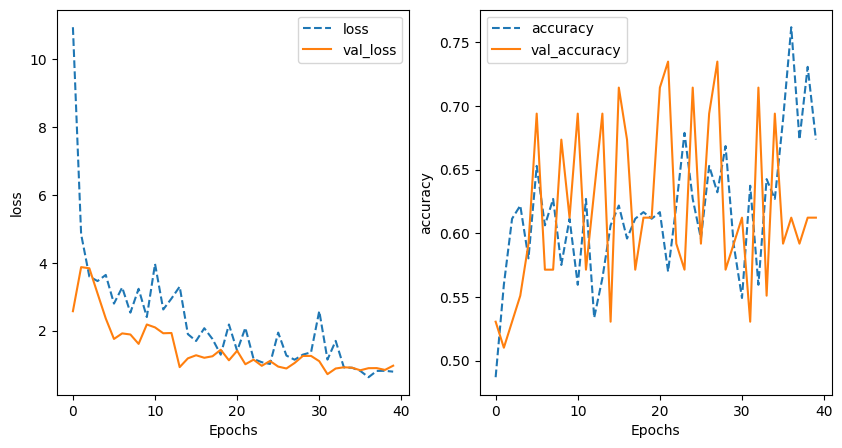

In [67]:
training_plot(['loss','accuracy'], history)